## Bài 1. Xác định các yếu tố của bài toán tìm kiếm cho các bài toán sau:

1. Đồ thị: Cho đồ thị có 5 đỉnh A, B, C, D được xác định bởi danh sách cạnh: A  {B,C,F}, B  {A, C, E, F}, C  {A,B,D, F}, D  {C, F}, E  {B,D,F}, F  {A,C,E}. Tìm đường đi từ đỉnh A đến đỉnh D.
Yêu cầu thêm: Hãy cho biết bậc của từng đỉnh đồ thị, bậc cao nhất và vẽ đồ thị cho bên trên.

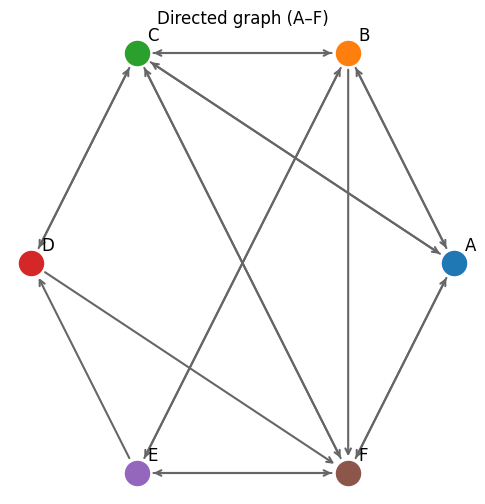

In [4]:
import math
import matplotlib.pyplot as plt

adj = {
    "A": ["B","C","F"],
    "B": ["A","C","E","F"],
    "C": ["A","B","D","F"],
    "D": ["C","F"],
    "E": ["B","D","F"],
    "F": ["A","C","E"],
}
nodes = sorted(adj.keys())

# toạ độ tròn
n = len(nodes)
pos = {nodes[i]: (math.cos(2*math.pi*i/n), math.sin(2*math.pi*i/n)) for i in range(n)}

plt.figure(figsize=(6,6))
ax = plt.gca()

# Vẽ cung có mũi tên
for u in nodes:
    for v in adj[u]:
        ax.annotate("",
                    xy=pos[v], xycoords="data",
                    xytext=pos[u], textcoords="data",
                    arrowprops=dict(arrowstyle="->", lw=1.5, color="0.4",
                                    shrinkA=12, shrinkB=12))

# Vẽ nút + nhãn
for u in nodes:
    x, y = pos[u]
    plt.scatter(x, y, s=300)
    plt.text(x+0.05, y+0.05, u, fontsize=12)

plt.axis("off")
plt.title("Directed graph (A–F)")
plt.show()


In [5]:
# Directed adjacency list
adj = {
    "A": ["B","C","F"],
    "B": ["A","C","E","F"],
    "C": ["A","B","D","F"],
    "D": ["C","F"],
    "E": ["B","D","F"],
    "F": ["A","C","E"],
}

nodes = sorted(adj.keys())

# out-degree: số cung đi ra từ đỉnh
out_deg = {u: len(adj[u]) for u in nodes}

# in-degree: đếm số lần đỉnh xuất hiện ở danh sách kề của các đỉnh khác
in_deg = {u: 0 for u in nodes}
for u in nodes:
    for v in adj[u]:
        in_deg[v] += 1

# In kết quả
print("node  in  out  total")
for u in nodes:
    print(f"{u:>4}  {in_deg[u]:>2}  {out_deg[u]:>3}  {in_deg[u]+out_deg[u]:>5}")

# Đỉnh có tổng bậc lớn nhất
total_deg = {u: in_deg[u] + out_deg[u] for u in nodes}
max_total = max(total_deg.values())
max_nodes = [u for u,d in total_deg.items() if d == max_total]
print("\nMax total degree:", max_total, "at nodes:", max_nodes)


node  in  out  total
   A   3    3      6
   B   3    4      7
   C   4    4      8
   D   2    2      4
   E   2    3      5
   F   5    3      8

Max total degree: 8 at nodes: ['C', 'F']


2. Mê cung: Tìm đường đi để con kiến có thể đi tới ô A trong mê cung cho bên dưới:

## Bài 2. Tìm đường đi từ 2 đỉnh trong đồ thị

1. Cho đồ thị như hình vẽ bên dưới:
Hãy biểu diễn đồ thị bằng ma trận kề và danh sách kề

2. Hãy phát biểu các yếu tố tìm kiếm của bài toán tìm đường đi trong đồ thị cho bên trên từ đỉnh A đến đỉnh B

3. Hãy chạy từng bước thuật toán tìm kiếm chiều sâu (DFS) và tìm kiếm chiều rộng (BFS), xây dựng bảng truy hồi
đường đi và cây tìm kiếm cho việc tìm đường từ A đến B trong đồ thị cho như trên

## Bài 3. Lập trình cho bài toán tìm kiếm trong đồ thị

1. Tạo tập tin biểu diễn đồ thị như trên bằng danh sách kề hay ma trận kề.

2. Cài đặt chương trình đọc tập tin và đưa vào cấu trúc dữ liệu tổ chức biểu diễn đồ thị bằng ma trận kề hay danh
sách kề.

3. Cài đặt chương trình duyệt theo chiều sâu và duyệt theo chiều rộng. In ra đường đi từ 2 đỉnh cho trước.

# Buổi 4: Tìm kiếm trong không gian trạng thái

### Bài 1. Biễu diễn đồ thị

Cho đồ thị hàm số **G** (**V**, **E**) như bên dưới:

![image](dothi.png)

#### 1. Biễu diễn bằng danh sách / ma trận kề

##### 1.1 Danh sách kề

In [23]:
""" CÁC BẠN LÀM BÀI Ở ĐÂY """
graph_adj_list = {
    'A': ['C', 'D', 'E', 'F'],
    'B': [],
    'C': ['H'],
    'D': ['E', 'H'],
    'E': ['I', 'K'],
    'F': ['G', 'I'],
    'G': [],
    'H': ['K'],
    'I': ['B', 'K'],
    'K': ['B']
}

for node, neighbors in graph_adj_list.items():
    print(f"{node}: {neighbors}")

A: ['C', 'D', 'E', 'F']
B: []
C: ['H']
D: ['E', 'H']
E: ['I', 'K']
F: ['G', 'I']
G: []
H: ['K']
I: ['B', 'K']
K: ['B']


##### 1.2 Ma trận kề

In [24]:
import numpy as np

vertices = ['A','B','C','D','E','F','G','H','I','K']
n = len(vertices)

adj_matrix = np.zeros((n,n), dtype=int)

# Các cạnh 
edges = [
    ('A','C'), ('A','D'), ('A','E'), ('A','F'),
    ('C','H'),
    ('D','E'), ('D','H'),
    ('E','I'), ('E','K'),
    ('F','G'), ('F','I'),
    ('H','K'),
    ('K','I'), ('K','B'),
    ('I','B')
]

# Điền vào ma trận
for u,v in edges:
    i, j = vertices.index(u), vertices.index(v)
    adj_matrix[i][j] = 1

# In ma trận kề
print("   " + " ".join(vertices))
print(adj_matrix)

   A B C D E F G H I K
[[0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]]


#### 2. Thao tác duyệt đồ thị
(a) Liệt kê các đỉnh trong đồ thị <br/>
(b) Liệt kê tất cả các cạnh đồ thị hiển thị dạng danh sách kề <br/>
(c) Cho hai đỉnh A, B. Hỏi hai đỉnh A, B có kề nhau không? <br/>
(d) Cho một đỉnh A. Hỏi danh sách các đỉnh kề với A <br/>

In [25]:
print("(a) Liệt kê các đỉnh trong đồ thị")
print("Các đỉnh của đồ thị: ", end = " ")
""" CÁC BẠN LÀM BÀI Ở ĐÂY """
print(sorted(graph_adj_list.keys()))

(a) Liệt kê các đỉnh trong đồ thị
Các đỉnh của đồ thị:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K']


In [26]:
print("(b) Liệt kê tất cả các cạnh đồ thị hiển thị dạng danh sách kề")
print("Danh sách kề của đồ thị: ")

def HienThiDoThi(G):
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    for u,v in G.items():
        print(f"+ Đỉnh {u}: {v}")
    pass

HienThiDoThi(graph_adj_list)

(b) Liệt kê tất cả các cạnh đồ thị hiển thị dạng danh sách kề
Danh sách kề của đồ thị: 
+ Đỉnh A: ['C', 'D', 'E', 'F']
+ Đỉnh B: []
+ Đỉnh C: ['H']
+ Đỉnh D: ['E', 'H']
+ Đỉnh E: ['I', 'K']
+ Đỉnh F: ['G', 'I']
+ Đỉnh G: []
+ Đỉnh H: ['K']
+ Đỉnh I: ['B', 'K']
+ Đỉnh K: ['B']


In [27]:
print("(c) Cho hai đỉnh A, B. Hỏi hai đỉnh A, B có kề nhau không?")

def LaKe(G, a, b):
    """
    input: G, a, b
    return: 
    + -1: dinh a, hay b khong ton tai
    +  0: dinh a, b ton tai va a khong ke b
    +  1: dinh a, b ton tai va a, b ke nhau
    """
    result = 0
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    if a not in G or b not in G:
        return -1
    if a in G.get(b):
        return 1
    return result

(c) Cho hai đỉnh A, B. Hỏi hai đỉnh A, B có kề nhau không?


In [28]:
a = "L"; b = "R"; print(f"{a} ke {b}: {LaKe(graph_adj_list, a, b)}")
a = "A"; b = "R"; print(f"{a} ke {b}: {LaKe(graph_adj_list, a, b)}")
a = "E"; b = "D"; print(f"{a} ke {b}: {LaKe(graph_adj_list, a, b)}")
a = "D"; b = "E"; print(f"{a} ke {b}: {LaKe(graph_adj_list, a, b)}")

L ke R: -1
A ke R: -1
E ke D: 1
D ke E: 0


In [29]:
print("(d) Cho một đỉnh A. Hỏi danh sách các đỉnh kề với A")

def LayKe(G, a):
    """
    input: G, a
    return: 
    + None: neu a khong ton tai
    + []  : a khong ke voi bat ky dinh nao
    + [x, y, ...]: mang cac dinh ke voi a
    """
    
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    if  G.get(a, []) == []:
        return None
    else:
        return G.get(a)

a = "P"; print(f"Danh sach ke voi dinh {a}: {LayKe(graph_adj_list, a)}")
a = "A"; print(f"Danh sach ke voi dinh {a}: {LayKe(graph_adj_list, a)}")
a = "B"; print(f"Danh sach ke voi dinh {a}: {LayKe(graph_adj_list, a)}")
a = "D"; print(f"Danh sach ke voi dinh {a}: {LayKe(graph_adj_list, a)}")

(d) Cho một đỉnh A. Hỏi danh sách các đỉnh kề với A
Danh sach ke voi dinh P: None
Danh sach ke voi dinh A: ['C', 'D', 'E', 'F']
Danh sach ke voi dinh B: None
Danh sach ke voi dinh D: ['E', 'H']


#### 3. Đọc và lưu đồ thị
**dske.txt**
```
10           # số đỉnh đồ thị
A C E F D    # đỉnh A kề với C E F D
B            # đỉnh B không kề với ai
C H
D E H
E K I
F I G
G
H K
I K B
K B
```

In [30]:
print("1. Lưu đồ thị xuống tập tin")

def LuuDoThi(G, file_path, verbose = True):
    import os
    
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    
    # Tạo thư mục chứa file_path
    file_dir = os.path.dirname(file_path)
    if file_dir != "" and os.path.exists(file_path) == False:
        os.makedirs(file_dir)
        if verbose: print(f"+ Tao thu muc: {file_dir}")
    
    # Lưu đồ thị
    with open(file_path, "wt") as file:
        """ CÁC BẠN LÀM BÀI Ở ĐÂY """
        file.write(f"{len(G)} \n")
        for node, neighbors in G.items():
            line = node + " " + " ".join(neighbors) + "\n"
            file.write(line)
        
        if verbose: print(f"Luu do thi thanh cong xuong tap tin: {file_path}")
    pass

LuuDoThi(graph_adj_list, "dske1.txt", verbose = True)
with open("dske1.txt", "rt") as file:
    lines = file.readlines()
    for line in lines: print(line, end="")

1. Lưu đồ thị xuống tập tin
Luu do thi thanh cong xuong tap tin: dske1.txt
10 
A C D E F
B 
C H
D E H
E I K
F G I
G 
H K
I B K
K B


In [31]:
print("2. Đọc đồ thị từ tập tin")
import pprint

def DocDoThi(file_path, verbose = True):
    """
    return:
    + None: doc that bai
    + <>None: tra ve do thi
    """
    import os
    
    result = None
    if os.path.exists(file_path) == False:
        result = None
    else:
        G = {}
        with open(file_path, "rt") as file:
            n = int(file.readline())
            """ CÁC BẠN LÀM BÀI Ở ĐÂY """
            for i in range(n):
                line = file.readline()
                vertices = line.split()
                if (len(vertices) > 1):
                    G[vertices[0]] = vertices[1:]
                else:
                    G[vertices[0]] = []
            
            pass
        result = G
    return result

G1 = DocDoThi("dske1.txt", verbose = True)
pprint.pprint(G1)

2. Đọc đồ thị từ tập tin
{'A': ['C', 'D', 'E', 'F'],
 'B': [],
 'C': ['H'],
 'D': ['E', 'H'],
 'E': ['I', 'K'],
 'F': ['G', 'I'],
 'G': [],
 'H': ['K'],
 'I': ['B', 'K'],
 'K': ['B']}


### Bài 2. Tìm kiếm đường đi trên đồ thị

#### 1. Tìm kiếm theo chiều rộng (BFS)

In [98]:
import pprint

def BFS(G, start, goal):
    """
    return: 
    + mang chua duong di tu a --> b, neu rong la ko co duong di
    + None: dinh a, b khong hop le
    """
    result = None
    
    if G.get(start) is None or G.get(goal) is None:
        result = None
    else:
        path = {}     # path[a]=b nghia la muon di toi dinh b phai qua a
        s_open   = []
        s_closed = []
        
        # đưa start vào open
        s_open.append(start)    
        path[start] = None
        while len(s_open)>0:
            """ CÁC BẠN LÀM BÀI Ở ĐÂY """
            u = s_open.pop(0)
            if u not in s_closed:
                s_closed.append(u)
                for v in G[u]:
                    if v not in s_closed and v not in s_open:
                        path[v] = u
                        s_open.append(v)
        result = path
    return result

In [99]:
path = BFS(graph_adj_list, "A", "B")
pprint.pprint(path)

{'A': None,
 'B': 'I',
 'C': 'A',
 'D': 'A',
 'E': 'A',
 'F': 'A',
 'G': 'F',
 'H': 'C',
 'I': 'E',
 'K': 'E'}


In [100]:
def find_path(path, start, goal):
    """
    Cho mang truy hoi duong, tim ds dinh tu start --> goal
    """
    result = []
    
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    tmp = goal
    while tmp != start:
        result.append(tmp)
        tmp = path[tmp]
        
    result.append("A")
    return result[::-1]
    pass

In [101]:
find_path(path, 'A', 'B')

['A', 'E', 'I', 'B']

#### 2. Tìm kiếm theo chiều rộng (DFS)

In [102]:
import pprint

def DFS(G, start, goal):
    """
    return: 
    + mang chua duong di tu a --> b, neu rong la ko co duong di
    + None: dinh a, b khong hop le
    """
    result = None
    
    if G.get(start) is None or G.get(goal) is None:
        result = None
    else:
        path = {}     # path[a]=b nghia la muon di toi dinh b phai qua a
        s_open   = []
        s_closed = []
        
        # đưa start vào open
        s_open.append(start)    
        path[start] = None
        while len(s_open)>0:
            """ CÁC BẠN LÀM BÀI Ở ĐÂY """
            u = s_open.pop()
            if u not in s_closed:
                s_closed.append(u)
                for v in G[u]:
                    if v not in s_open:
                        s_open.append(v)
                        path[v] = u
            pass
        
        result = path
    return result

In [103]:
path = DFS(graph_adj_list, "A", "B")
pprint.pprint(path)

{'A': None,
 'B': 'I',
 'C': 'A',
 'D': 'A',
 'E': 'D',
 'F': 'A',
 'G': 'F',
 'H': 'C',
 'I': 'E',
 'K': 'H'}


# Kết thúc